# Assginment 2
### Nicole Meng, s1513402, 12.11.2018

In this assignment, I am going to explore the entertainment dataset. This data set includes two separate data sheets, one with details about single users and the other with concrete indications on the participant's usage of the entertainment system. 


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
from dateutil.relativedelta import relativedelta
%matplotlib inline

data = pd.read_csv("CC-data-anonym.csv", low_memory=False)
user = pd.read_csv("CC-user.csv", low_memory=False)

data.head()

,Time,ExternalID,Role,Building,LinkTitle,LinkType,ContentInfo,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219
0,29/10/2018 10:55,5325,User,Broom Ground,Sam Smith,Internet,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29/10/2018 10:50,5325,User,Broom Ground,Elton John,Internet,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29/10/2018 10:49,5325,User,Broom Ground,My Music,Category,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29/10/2018 10:49,5325,User,Broom Ground,Entertainment,Category,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29/10/2018 10:48,NaN,User,Belses Gardens - Care Home,BBC Formula 1,Internet,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
user.head()

,ExternalID,CleverCogsUserId,BirthDate,Gender,Condition
0,4703,685,04/07/1965,F,Spina Bifida
1,4704,772,21/06/1940,F,COPD
2,4706,1128,25/02/1931,F,Dementia
3,4707,1159,18/09/1982,F,Brain Injury
4,4708,784,20/12/1931,F,NaN


## Description of the Data

The data has been delivered as two Tables. The key 'ExternalID' corresponds to the 'ExternalID' key in the user table and identifies each user uniquely in the user table. So, the two data sets are linked by a unique key in the user table and a external, foreig key in the data table.

### Cleaning
Although the data is supposed to be clean according to the data host, we have found that in some rows of the data set, the user ID is missing. These rows will be disregarded in an analysis that requires a merge of these tables.  
As seen above, a high number of unnamed columns was added. These will be dropped.

After some analysis, it has been discovered that data from the ContentInfo column has leaked into an extra row. Therefore, all lines that contain special characters should be deleted in fields not from ContentInfo or LinkType.

When comparing the age of the users, it is interesting that there are two entires that do not contain any other information but the birth date, which is set to two dates in July 2018. We expect that this data is erroneous and will delete it. 

### How large and complex is it (rows/columns, size, variation, structure)

In [15]:
# Drop extra added columns
data = data[data.columns.drop(list(data.filter(regex='Unnamed*')))]

print("Number of rows after removing erroneous columns: ", data.shape[0])

# Drop all rows that  contain special characters
# From column Building
patternDel = "[=*+*<*>*§*%*&*:*;*]+"
filter2 = (data.Building.fillna(value="0")).str.contains(patternDel)
data = data.drop(data[filter2 == True].index)

# From column Role
filter2 = (data.Role.fillna(value="0")).str.contains(patternDel)
data = data.drop(data[filter2 == True].index)

# From column LinkType
filter2 = (data.LinkType.fillna(value="0")).str.contains(patternDel)
data = data.drop(data[filter2 == True].index)

print("Number of rows after removing erroneous Building rows: ", data.shape[0])

# Delete all duplicate rows
data = data.drop_duplicates(keep="first")
print("Number of rows after removing duplicates: ", data.shape[0])

data.head(100)

Number of rows after removing erroneous columns:  88442


TypeError: 'NoneType' object is not iterable

In [5]:
print("Number of rows: ", user.shape[0])

# Drop duplicate rows
user = user.drop_duplicates(keep="first")
print("Number of rows after removing duplicates: ", user.shape[0])
user.head()

Number of rows:  695
Number of rows after removing duplicates:  695


,ExternalID,CleverCogsUserId,BirthDate,Gender,Condition
0,4703,685,04/07/1965,F,Spina Bifida
1,4704,772,21/06/1940,F,COPD
2,4706,1128,25/02/1931,F,Dementia
3,4707,1159,18/09/1982,F,Brain Injury
4,4708,784,20/12/1931,F,NaN


In [6]:
print("The entertainment data set has", data.shape[0], "rows and", data.shape[1], "columns.")
print("The user data set has", user.shape[0], "rows and", user.shape[1], "columns.")

The entertainment data set has 121637 rows and 7 columns.
The user data set has 695 rows and 5 columns.


### What fields and data types are present (max/min, levels for categorical values).


In [7]:
# usage data
print("Different Roles: ", (data['Role'].dropna()).unique())
print("Different Categories: ", (data['LinkType'].dropna()).unique())
print("Number of different Link Titles: ", len((data['LinkTitle'].dropna()). unique()))

Different Roles:  ['User' 'Support']
Different Categories:  ['Internet' 'Category' 'HTML page' 'Radio' 'Services' 'Standard page'
 'Gallery' 'Phone']
Number of different Link Titles:  863


In [8]:
# user data
print("Different Conditions: ", (user['Condition'].dropna()).unique())

Different Conditions:  ['Spina Bifida' 'COPD' 'Dementia' 'Brain Injury' 'Elderly Care/Support'
 'Cerebral Palsy' 'Epilepsy' 'Multiple Sclerosis' 'Diabetes' 'Amputee'
 'Learning Difficulties' 'Stroke' 'Visual Impairment' 'Arthritis'
 "Huntington's" 'Parkinsons' 'Down Syndrome'
 'Progressive Supranuclear Palsy' 'Bi Polar Disorder' 'Spinal Injury'
 'Asthma' 'Muscular Dystrophy' 'Lifelong Mobility Issues'
 'Cerebellar Ataxia' 'Cancer' 'Physical Injury']


### Summary statistics about the data - how many people, what time frame, field averages etc.

In [9]:
print("Number of different users: ", len((data['ExternalID'].dropna()).unique()))
print("Number of different houses: ", len((data['Building'].dropna()).unique()))

data['Time'] = pd.to_datetime(data['Time'], errors='coerce', dayfirst=False, yearfirst=False, 
                   format=None, utc=False, infer_datetime_format=True, origin='unix')
data = data.set_index(pd.DatetimeIndex(data['Time']))


minTime = data['Time'].min()
maxTime = data['Time'].max()
print("First time stamp: ", minTime)
print("Last time stamp: ", maxTime)
diff = relativedelta(maxTime, minTime)
print("The data has been collected over", diff.months, "months and", diff.days, "days.")
data.head()

Number of different users:  99
Number of different houses:  22
First time stamp:  2018-01-01 00:20:00
Last time stamp:  2018-10-29 10:55:00
The data has been collected over 9 months and 28 days.


,Time,ExternalID,Role,Building,LinkTitle,LinkType,ContentInfo
Time,,,,,,,
2018-10-29 10:55:00,2018-10-29 10:55:00,5325,User,Broom Ground,Sam Smith,Internet,NaN
2018-10-29 10:50:00,2018-10-29 10:50:00,5325,User,Broom Ground,Elton John,Internet,NaN
2018-10-29 10:49:00,2018-10-29 10:49:00,5325,User,Broom Ground,My Music,Category,NaN
2018-10-29 10:49:00,2018-10-29 10:49:00,5325,User,Broom Ground,Entertainment,Category,NaN
2018-10-29 10:48:00,2018-10-29 10:48:00,NaN,User,Belses Gardens - Care Home,BBC Formula 1,Internet,NaN


In [10]:

user['BirthDate'] = pd.to_datetime(user['BirthDate'], errors='coerce', dayfirst=False, yearfirst=False, 
                   format="%d/%m/%Y", utc=False, infer_datetime_format=False, origin='unix')
user = user.set_index(pd.DatetimeIndex(user['BirthDate']))

# Remove erroneous entries
threshold = pd.to_datetime("2010-01-01", format="%Y-%m-%d", utc=False, origin='unix')
user = user[user['BirthDate'] < threshold]

print("Oldest Person was born on", (user['BirthDate'].min()).normalize().date(),".")
print("Youngest Person was born on", (user['BirthDate'].max()).normalize().date(), ".")

user.head()

Oldest Person was born on 1910-10-10 .
Youngest Person was born on 2000-07-18 .


,ExternalID,CleverCogsUserId,BirthDate,Gender,Condition
BirthDate,,,,,
1965-07-04,4703,685,1965-07-04,F,Spina Bifida
1940-06-21,4704,772,1940-06-21,F,COPD
1931-02-25,4706,1128,1931-02-25,F,Dementia
1982-09-18,4707,1159,1982-09-18,F,Brain Injury
1931-12-20,4708,784,1931-12-20,F,NaN


### How does the data relate to the questions that the data owner has discussed with you?
The data is tabular as expected. After a first look at the data, we realised that we were missing the significatn data set describing the users. 

The usage data gives us a time stamp and what the user was doing at this specific time. However, as we are interested in discovering more about the usage, we are interested in the total time of the systems usage. Therefore, a clever way to connect the time stamp of a click with the duration of the interaction should be found.

## Exploratory Analysis

For the exploratory analysis, we will be looking at the different aspects of the data. 

### General Information about the users
1. How many users does each building have who interact with the system?
5. How many female, how many male are using it? 
6. How many users each day have engaged with the internet or entertainment system? 
1. What is the age distribution of the users of the system? 






<a id='E1'></a>
### 1. How many users does each building have who interact with the system?

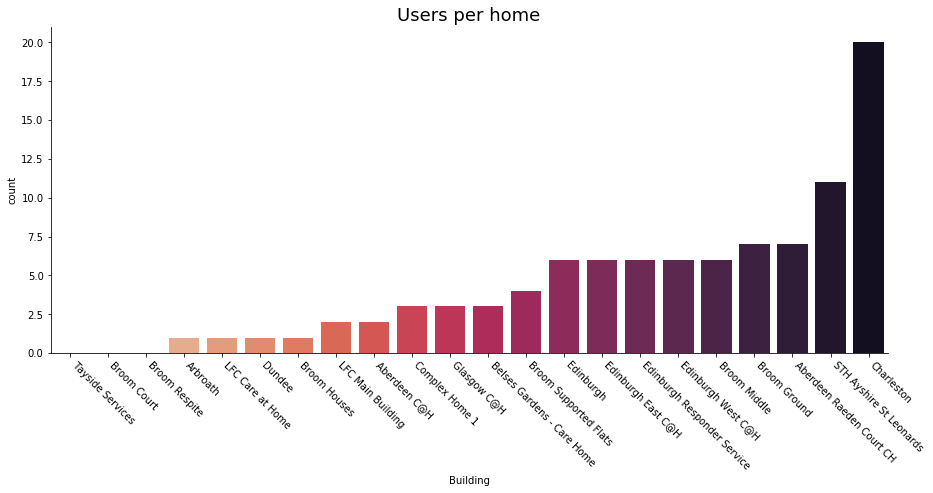

In [11]:
buildingUser = data.groupby('Building')["ExternalID"].nunique().reset_index(name="count").sort_values(by=['count'])
buildingUser = buildingUser.dropna()

fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5})
graph = sns.barplot(x="Building", y="count", palette="rocket_r", data=buildingUser, ax=ax)
sns.despine()
plt.xticks(rotation=-45, ha='left')
plt.title("Users per home")
plt.show()


<a id='E2'></a>
### 2. How many female, how many male are using it? 

In [12]:
fem = user.loc[user["Gender"] == "F"]
mal = user.loc[user["Gender"] == "M"]
print("number of female partients: ", fem.shape[0])
print("number of male partients: ", mal.shape[0])

number of female partients:  410
number of male partients:  273


<a id='E3'></a>
### 3. How many users each day have engaged with the internet or entertainment system? 


Average per month:  8844.2
Average per day:  292.8543046357616


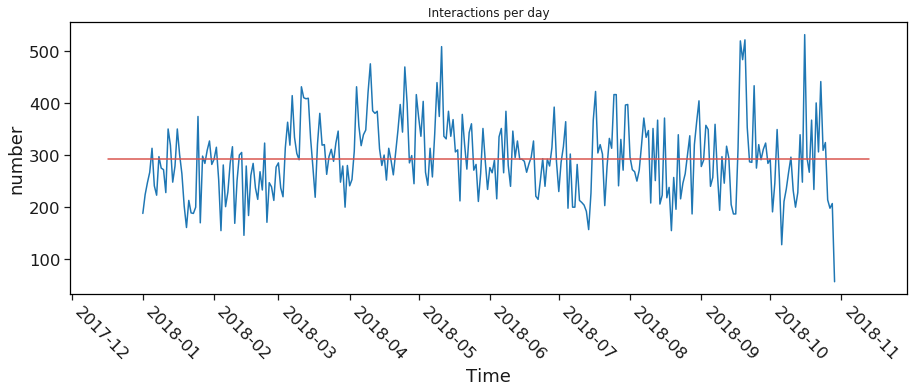

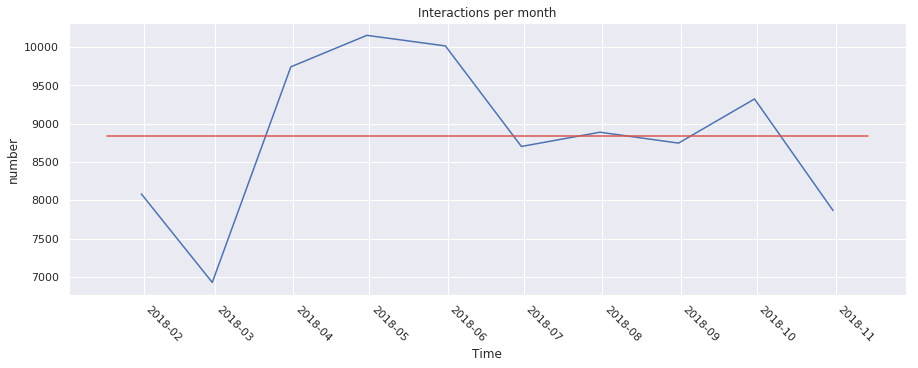

In [14]:
#Number of interactions
# Group by month and day
# month = data['Time'].resample('M').count().reset_index(name="number")
data = data[data['ExternalID'].notna()]
month = data['Time'].resample('M').count().reset_index(name="number")
mav = month['number'].mean()
print('Average per month: ', mav )

day = data['Time'].resample('D').count().reset_index(name="number")
dav = day['number'].mean()
print('Average per day: ', dav)



fig, ax = plt.subplots()
fig.set_size_inches(15, 5)

da = sns.set(style="darkgrid")
sns.lineplot(x="Time", y="number", data=day, legend="full")
plt.xticks(rotation=-45, ha='left')
plt.title("Interactions per day")
x = plt.gca().axes.get_xlim()
plt.plot(x, len(x) * [dav], sns.xkcd_rgb["pale red"])
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
mo = sns.set(style="darkgrid")
sns.lineplot(x="Time", y="number", data=month, legend="full")
plt.xticks(rotation=-45, ha='left')
plt.title("Interactions per month")
x = plt.gca().axes.get_xlim()
plt.plot(x, len(x) * [mav], sns.xkcd_rgb["pale red"])
plt.show()



<a id='E4'></a>
### 4. What is the age distribution of the users of the system? 

The oldest person is  108  years old.
The youngest person is  18  years old.


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


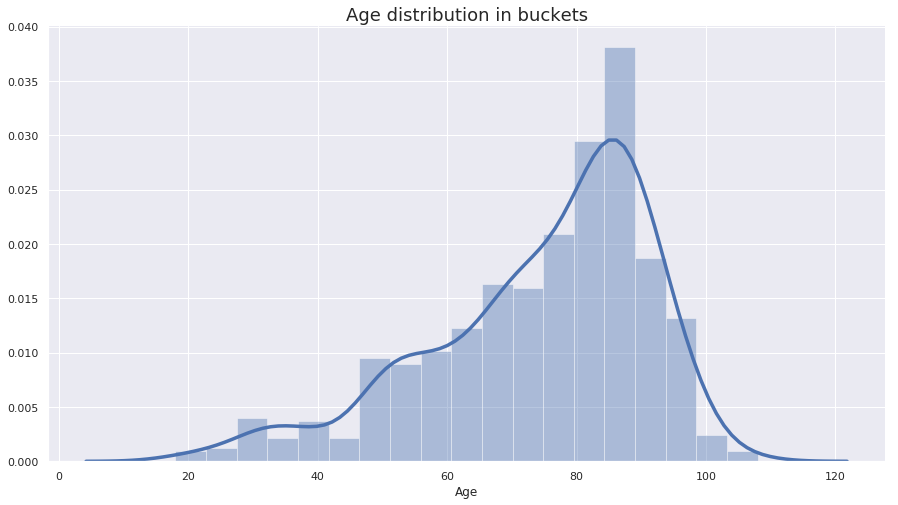

The average age is 74.50363901018923 and the median is 79.0


In [719]:

now = pd.to_datetime(date.today())

def getYears(start):
    diff = relativedelta(now, start)
    return diff.years

# Add a new column that contains the age of the user
user["Age"] = user['BirthDate'].map(getYears)

print("The oldest person is ", user.Age.max(), " years old.")
print("The youngest person is ", user.Age.min(), " years old.")

# Sort the users into age buckets
bins = pd.cut(user['Age'], np.linspace(15,110,20))
ageGroups = user.groupby(bins)['Age'].agg(['count', 'mean', 'median'])



fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5})
plot = sns.distplot(user.Age, ax = ax)
sns.despine()
plt.title("Age distribution in buckets")
plt.show()

# plot with counts
median = user["Age"].median()
mean = user["Age"].mean()
print("The average age is", mean, "and the median is", median)
#mode = user["Age"].mode().get_values[0]

#TODO draw median  and mean line
#plt.plot(y, len(y) * [mean], sns.xkcd_rgb["pale red"])
#ax.axvline(mean, color='r', linestyle='--')
#ax_hist.axvline(median, color='g', linestyle='-')
#ax_hist.axvline(mode, color='b', linestyle='-')




## Deeper Analysis 
 
1. Which disabilities are present among the users of the system? What is the average for each disability? Is there a correlation to mobility issues?
5. What age are the users? Is there a correlation between age and usage?
3. At which time of the day do users interact most often with the system? 
4. Is there a correlation between the age, condition, gender and the usage?


<a id='D1'></a>
### 1. Which disabilities are present? How is the distribution regarding genders?


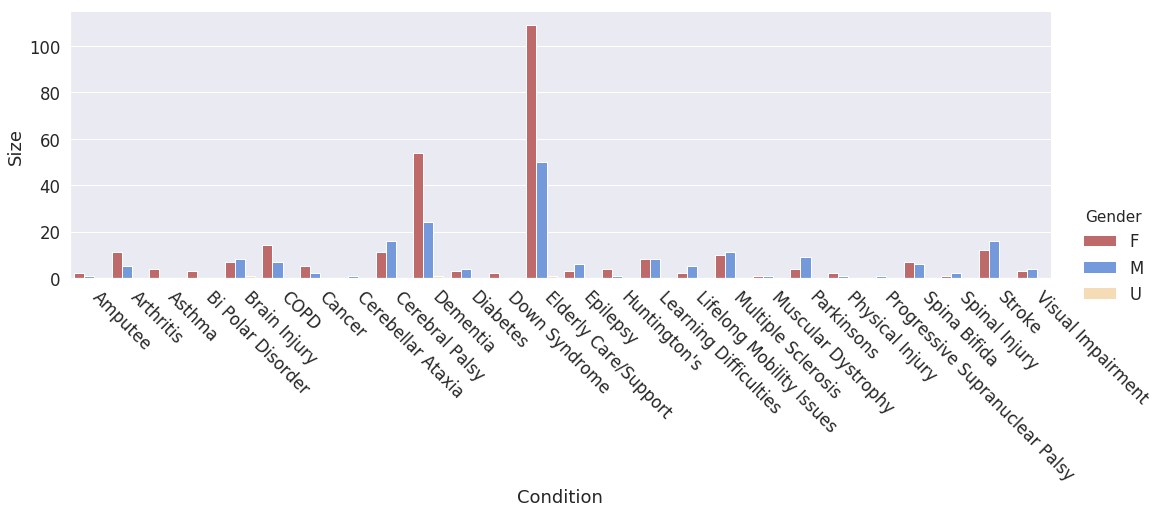

In [720]:
conGroup = user.groupby(['Condition', 'Gender'])["ExternalID"].nunique().reset_index(name="Size")

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5})
plot = sns.catplot(x="Condition", y="Size", hue="Gender", kind="bar", data=conGroup, 
                   aspect=3, height=5,  palette=['indianred', 'cornflowerblue', 'navajowhite'])
plt.xticks(rotation=-45, ha='left')
plt.show()


<a id='D2'></a>
### 2. Is there a correlation between the application usage and the age?


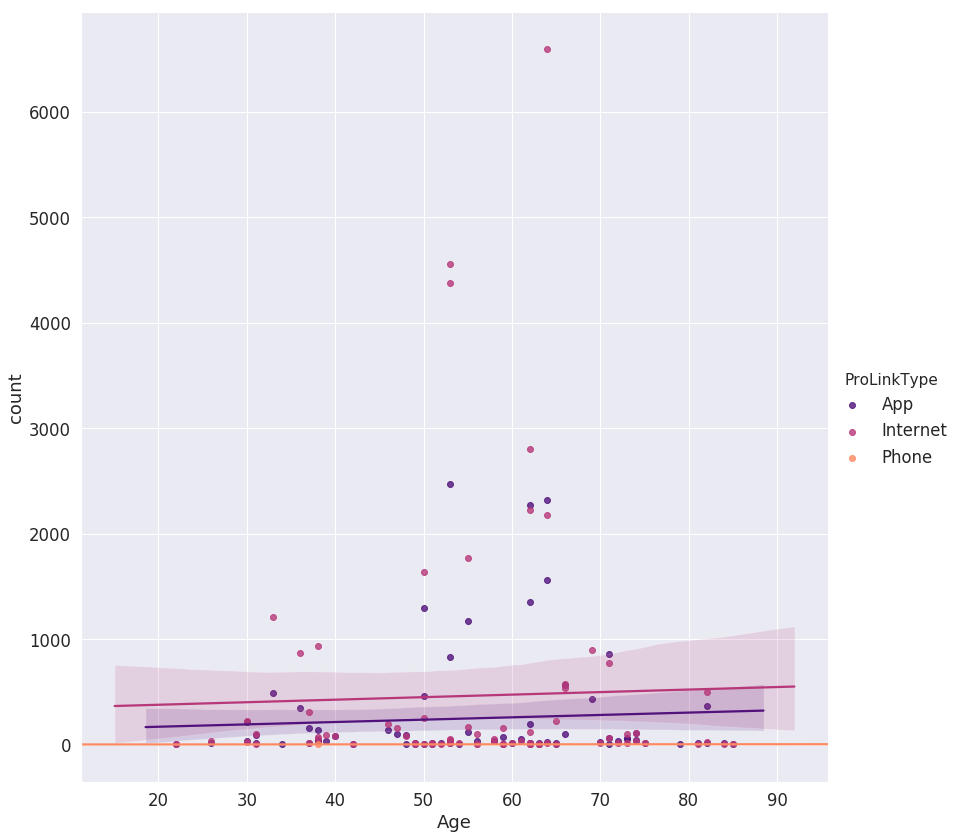

In [721]:
# #reset index to allow merge

dataRe = data.reset_index(drop=True)
userRe = user.reset_index(drop=True)

# merge data and user to get a table with the usage and the age
dataRe.ExternalID = (dataRe.ExternalID.fillna(0)).astype(dtype='int64')
dataUserInner = pd.merge(dataRe, userRe, on ="ExternalID", how="inner")
#print(data.dtypes)
#print(user.dtypes)

# Merge seemed to have changed the values of data.ExternalID to floats instead of int... ARRRGH!!
#data.ExternalID = data.ExternalID.dropna().astype(int)
#dataUserInner.ExternalID = dataUserInner.ExternalID.dropna().astype(int)

def groupTo(link):
    if link in ['Category', 'Radio', 'Gallery', 'Services']:
        return 'App'
    elif link in ['Internet', 'HTML page', 'Standard page']:
        return 'Internet'
    else:
        return link
    
dataUserInner['ProLinkType'] = dataUserInner['LinkType'].map(groupTo)

# count how often each user interacted with the system
dataUserInnerGrouped = dataUserInner.groupby(['ExternalID', 'Age', 'ProLinkType'])["Time"].nunique().reset_index(name="count")
# plot age and number of interaction on scatterplot


sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})
plot = sns.lmplot(x="Age", y="count", hue="ProLinkType", data=dataUserInnerGrouped, height=12, palette="magma")
plt.show()

<a id='D3'></a>
### 3. At which time of the day do users interact most often with the system?


Text(0.5, 1.0, 'Usage distribution over a day')

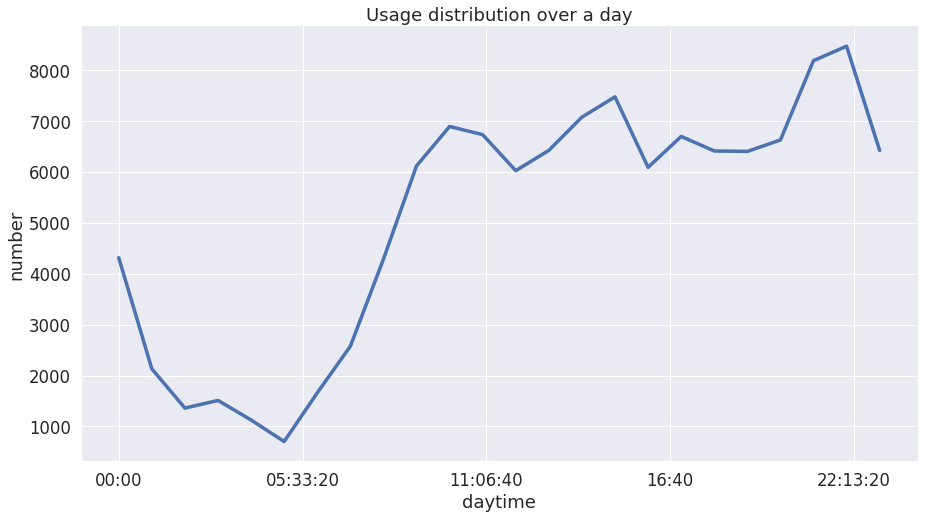

In [722]:
# Change all times to be on the same day and convert to datetimeindex
daytimes = (data.Time.map(lambda t: t.replace(year=2013, month=2, day=1))).reset_index(name="daytime")
daytimes['daytime'] = pd.to_datetime(daytimes['daytime'], errors='coerce', dayfirst=False, yearfirst=False, 
                   format=None, utc=False, infer_datetime_format=True, origin='unix')
daytimes = daytimes.set_index(pd.DatetimeIndex(daytimes['daytime']))

# count interaction per hour
daytimes = daytimes['daytime'].resample('H').count().reset_index(name="number")
daytimes['daytime'] = daytimes[daytimes['daytime'].notnull()]['daytime'].dt.time

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5})
fig, ax = plt.subplots()
mightfig.set_size_inches(15, 8)
sns.lineplot(x="daytime", y="number", data=daytimes, ax = ax)
sns.despine()
plt.title("Usage distribution over a day")



<a id='D3'></a>
### 4. Is there a correlation between the age, condition, gender and the usage?

In [723]:
times = dataUserInner.filter(['Time', 'Age','ExternalID', 'Gender', 'Condition'], axis=1)
times['Time'] = (times.Time.map(lambda t: t.replace(year=2013, month=1, day=1)))
times = times.set_index(pd.DatetimeIndex(times['Time']))
times.head()

# There must be a better way to do it, however, after hours of googling, I am going
# to do it the iterative way. 'Premature optimization is the root of all evil' -- DonaldKnuth

# Don't worry, this part runs for at least 30s. 

# Create the buckets
dates = pd.date_range('1/1/2013', periods=24, freq='H')
buckets = sorted(set(zip(list(range(0,24)), dates)))

# Iterate over the time and assign buckets for each time of day

def getBucket(time):
    for bucket in buckets: 
        diff = relativedelta(time, bucket[1])
        if diff.hours == 0 and diff.minutes <= 60:
            #print(diff.minutes)
            # return (str(bucket[0]) + '-'+ str(bucket[0]+1))
            return bucket[0]
#     return (str(bucket[-1][0]) + '-'+ str(bucket[-1][0]+1)) 
    return bucket[-1][0]
    

times["Hours"] = times['Time'].map(getBucket)

In [724]:
# create age buckets

def getAgeBucket(age):
    start = int(age/10)*10
    if age < start+5:
#         return (str(start) + '-' + str(start+5))
        return start
    else:
#         return (str(start+5) + '-' + str(start+10))
        return start+5


times["AgeRange"] = times['Age'].map(getAgeBucket)


In [725]:
# Group by age and condition
condGrouped = times.groupby(['Hours', 'Condition'])["ExternalID"].count().reset_index(name="CondCount").sort_values(by=['Hours'])

ageGrouped = times.groupby(['Hours', 'AgeRange'])["ExternalID"].count().reset_index(name="AgeCount").sort_values(by=['Hours'])

genderGrouped = times.groupby(['Hours', 'Gender'])["ExternalID"].count().reset_index(name="GenCount").sort_values(by=['Hours'])


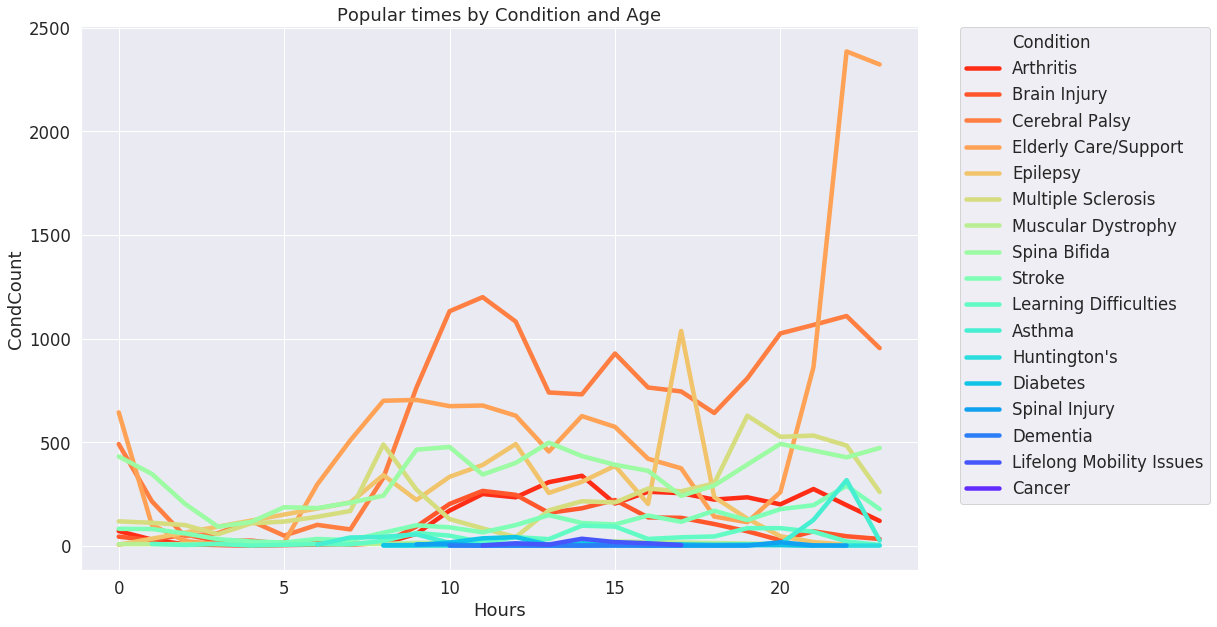

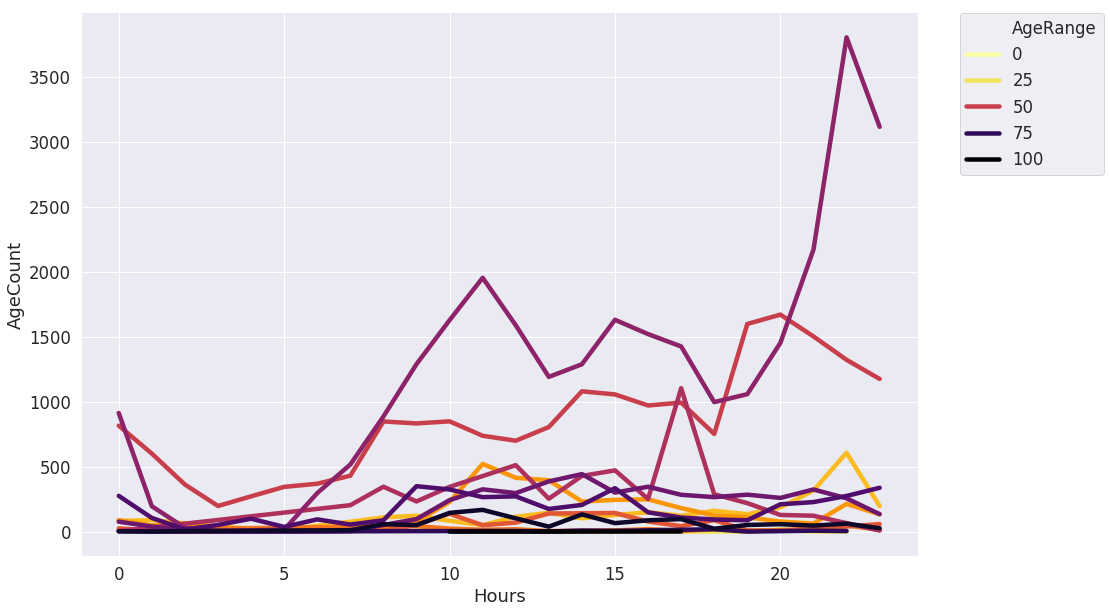

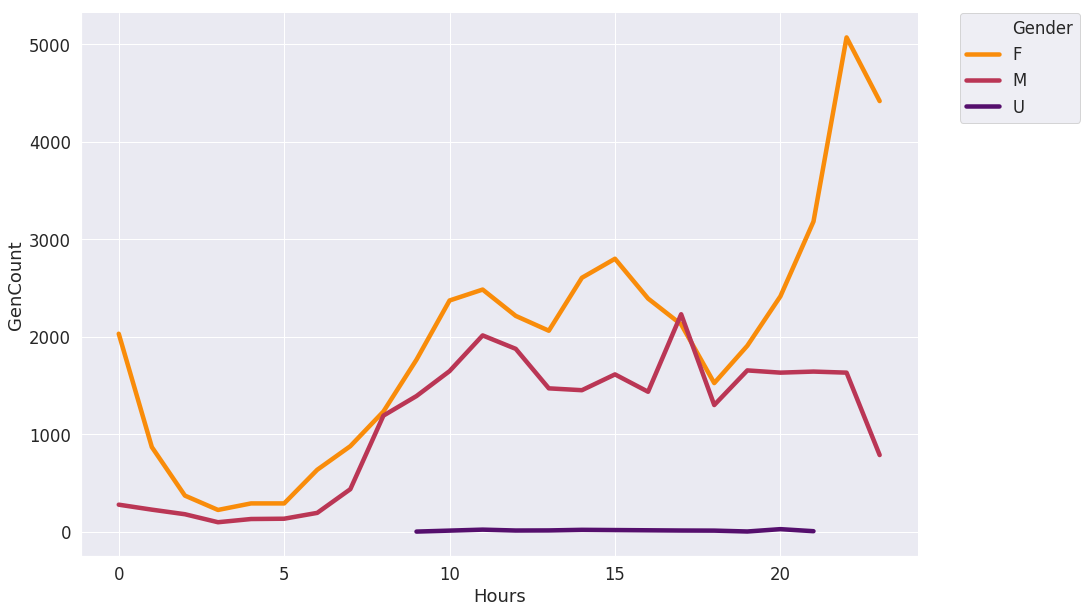

In [726]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 4.5})

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.lineplot(x= 'Hours', y='CondCount', data = condGrouped, hue="Condition", palette='rainbow_r')
sns.despine()
plt.title("Popular times by Condition and Age")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.lineplot(x='Hours', y='AgeCount', data=ageGrouped, hue='AgeRange', palette='inferno_r')
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.lineplot(x='Hours', y='GenCount', data=genderGrouped, hue='Gender', palette='inferno_r')
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Self-Reflection

### Reflection on the data
The data sets was delivered mostly clean with missing values. However, if one only analysed a certain aspect, some part of the data has proved to be helpful. Through the correspondence with the data hosts, we have learned about their visions and wishes. Unfortunately, it turned out that the data set regarding the system usage delivered, did not include the required information, but other interesting findings were made. With data about 695 patients (including the 99 users of the system) and a log of the systems usage of 9 months, it includes information about which user engages in which activity. By combining the usage data set with the user data set, it was possible to connect more personal information such as the age and condition to the online activities. 



### Questions I would have loved to analyse: 
1. How often do users use the system?
2. What is the average usage time in different seasons?
3. Development per week? How long did they use it in the first week, and in other weeks?  Do they interact more or less after a while?
Unfortunately, the data only provides a log with timestamps. Therefore, is not sufficient to infer the length of each interaction from this. We will discuss this issue with the data host and find our a way to answer this question.
 

 
### Exploratory Analysis
1. How many users does each building have who interact with the system?
2. How many female, how many male are using it?
3. How many users each day have engaged with the internet or entertainment system?
4. What is the age distribution of the users of the system?


### Deeper Analysis 
 
1. Which disabilities are present among the users of the system? What is the average for each disability? Is there a correlation to mobility issues?
5. What age are the users? Is there a correlation between age and usage?
3. At which time of the day do users interact most often with the system? 
4. Is there a correlation between the age, condition, gender and the usage?


#### Unfullfilled Hypothesis: 
[Plot for Deeper Analysis D2](#D2)
From [E4](#e4)'s median, we see that half of the users are over 79 years old. This means, only a small number of users can be considered tech savvy. This leads to the question if there is a difference between the usage of the system in users of different age groups. Through natural bias, we expected to see that younger users engage more in the entertainment system. 

However, this plot shows that the usage is evenly distributed across the age groups. The different link types that belong to the internet or the application have been summarised to show a the plot. It is visible that both systems are used and that the Internet tools are clicked more often than the app services. However, both lines seem parallel, therefore, the ration of older and younger people per system is the same. 




 

## 1. Elderly support users use the system more than user with other conditions.

[Corresponding Plot Deeper Analysis 4.](#D4)

The plot of patients who require elderly support show a slightly different graph. The engagement stays steady from the morning on until the afternoon and rises sharply after 9pm. This might indicate that the system is used for leisure, which might be in the afternoon after lunch and in the evening after dinner. Interestingly, a similar progress can be seen in the following two plots, as the graphs for users over 60 shows a similar plot. 
As we have seen before, two thirds of the patients in elderly care are female. Therefore, a similar usage movement is indicated in the bottom plot. 

Although elderly people seemed to have larger spiked in the usage, it can be seen that people older than 90 engage very little with the system and that usually steadily during the day. 

This hypothesis should be tested with further normalised numerical values. It would take away a certain bias to calculate an average usage time for each user and compare that with users with other disabilities. However, as mentioned in the beginning, this data set does not allow for a calculation of usage times. Therefore, a correspondence with the data host will be necessary.



## 2. The distribution of the usage over time indicates how the routine is in each care home.
[Corresponding Plot Deeper Analysis 3.](#D3) [and Deeper Analysis D4](#D4)


As we are interested in how users interact with the system, it is necessary to analyse when it is used. The plot D3 shows that users start using it in the morning. The steady increase could be caused by people getting up at different times in the day. 
There are three major drops visible. One around noon, one around 4:40pm to 8pm with a slight rise in between and a drop after 10pm. This can be explained by typical routine activities such as lunch, afternoon tea/dinner and socialising and bedtime. 

Also, some conditions show characteristics in their plot in D4. The first plot shows the different conditions. A number of conditions show strong spikes, which means that many users with that disability use the system at the same time. 
For Cerebral Palsy, a spectrum of permanent movement disorders, the activity increases around midday, slightly at 3pm and after dinner. This might indicate boredom around that time, but could also indicate that patients are engaging in the same activity togethe as part of therapy. Similarily, the line for eplileptic users shows a sharp spike in the afternoon around 5pm. Interestingly, the male graph in the third plot shows a similar spike at the same time. However, this interpretation lacks information about the therapy that users engage in and allows other interpretation such as the regualr watching of a TV show. To confirm this hypothesis, consultation with a caretaker would be required as to how the lifestly correlates to the condition.

Further, more information about the routine in care homes is needed to be accurate. To further test this hypothesis, the usage for each home should be checked individually. The values should be normalised by an average to make the comparison less biased.


## 3. Users engage with the system less often during summer.
[Corresponding Plot Exploratory Analysis E3](#E3)

The plot E3 compares the number of interactions per day and month. The plot that shows monthly interactions seems to have a strong decrease in the month of March. However, this is due to the scale of the y-Axis. In fact, the values have a variation of 3000 interactions, which is less significant than expected, but indicated a drop in usage in the months of February/March and June/July. This could show that patients engage in alternative activities, maybe outdoor during summer. 


In order to test the hypothesis further, the usage in hours should be calculated and normalised for each user. Again, this requires correspondence with the data host. It might make sense to compare different seasons or create a heatmap with the average usage time. In other words, more targeted visualisation will be helpful to proof it. 



## 4. Female patients interact more with the system
[Corresponding Plots are Exploratory Analysis 2.](#E2) [and Deeper Analysis D1](#D1) [and Deeper Analysis D4](#D4)

From the first overview, we know that there are nearly twice as many female patients as male ones. As mentiones above, D1 shows that two thirds of elderly support patients are female. This explains the larger number of female users in plot D4, which shows the difference in the number of interactions between female and male users. We can see that female users start earlier in the morning and have more interaction in the evening. 

Thi hypothesis should be tested further with normalised values, as mentioned before, and include more detail on the content they are engaging with. It would be interesting to analyse the different activities. 


